In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv('/content/loan_approval_dataset.csv')

In [3]:
print(df.shape), print(df.columns), print(df.head())


(4269, 13)
Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      2

(None, None, None)

In [7]:
print(df.columns)


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [9]:
df.isnull().sum()


,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [10]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(method='ffill', inplace=True)


<ipython-input-10-1479354788>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward-fill for remaining missing values (like 'education')


In [13]:
df.columns = df.columns.str.strip()


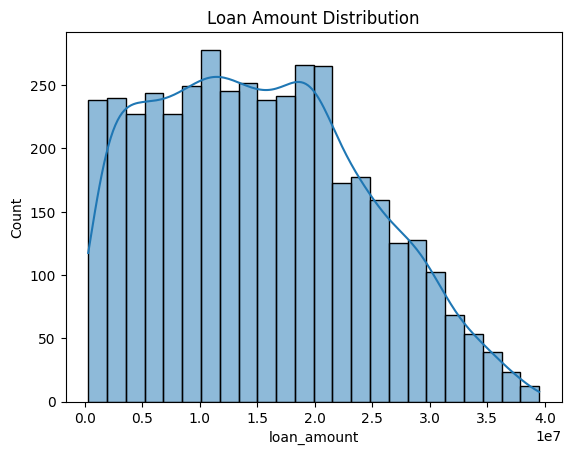

In [14]:
sns.histplot(df['loan_amount'], kde=True)
plt.title('Loan Amount Distribution')
plt.show()


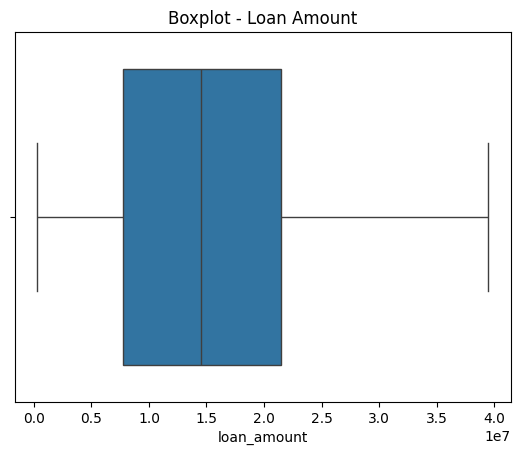

In [15]:
sns.boxplot(x=df['loan_amount'])
plt.title('Boxplot - Loan Amount')
plt.show()


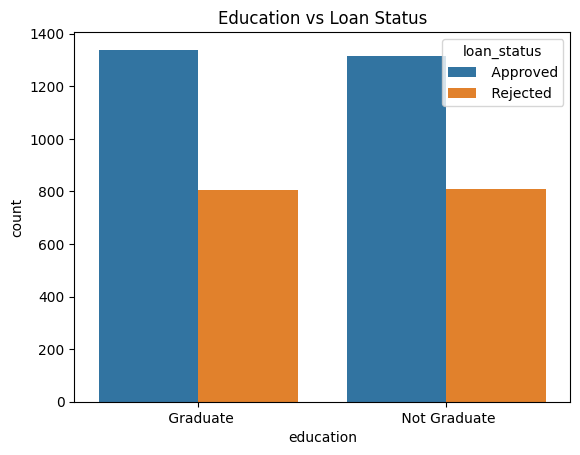

In [16]:
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education vs Loan Status')
plt.show()


In [18]:

df_encoded = pd.get_dummies(df, columns=['education', 'self_employed'], drop_first=True)


X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']


In [19]:

df_encoded = pd.get_dummies(df, columns=['education', 'self_employed'], drop_first=True)

X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']


In [20]:

df_encoded = pd.get_dummies(df, columns=['education', 'self_employed'], drop_first=True)


X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']


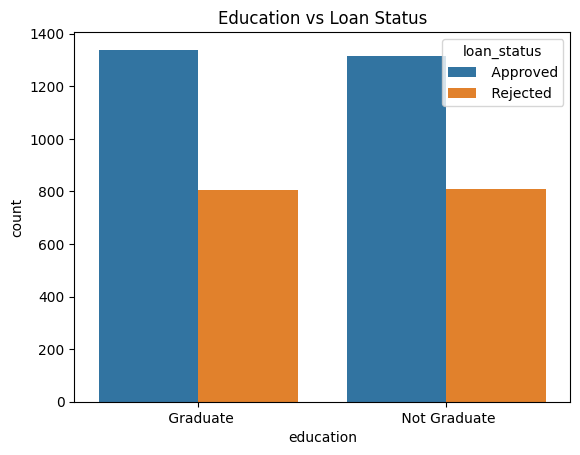

In [21]:
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Education vs Loan Status')
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8220140515222483
Confusion Matrix:
 [[492  44]
 [108 210]]
